In [1]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Wednesday-workingHours.pcap_ISCX.csv

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv',encoding='utf-8')
df.dtypes
# df['Destination-Port'] = df['Destination-Port'].astype(str, errors = 'raise')
dfn = df.convert_dtypes()
df.head(10)
# dfn.dtypes
print(dfn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  Int64  
 1    Flow Duration                692703 non-null  Int64  
 2    Total Fwd Packets            692703 non-null  Int64  
 3    Total Backward Packets       692703 non-null  Int64  
 4   Total Length of Fwd Packets   692703 non-null  Int64  
 5    Total Length of Bwd Packets  692703 non-null  Int64  
 6    Fwd Packet Length Max        692703 non-null  Int64  
 7    Fwd Packet Length Min        692703 non-null  Int64  
 8    Fwd Packet Length Mean       692703 non-null  Float64
 9    Fwd Packet Length Std        692703 non-null  Float64
 10  Bwd Packet Length Max         692703 non-null  Int64  
 11   Bwd Packet Length Min        692703 non-null  Int64  
 12   Bwd Packet Length Mean       692703 non-nul

In [3]:
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.132505e+02,52.208416,38308.000000,0.000000,38308,38308,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3.195596e+03,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,4.512501e+05,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,4.965374e+05,0,0,0,1,0,0,0,0,0,348.689655,203.058823,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,4.964401e+05,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,163,0,81.500000,94.108094,1.150115e+06,34642.032330,30.928571,27.744616,74,0,433,43.300000,41.798591,109,0,222,74.000000,126.439709,220,1,0,0,0,0,368,144,25404.157040,9237.875289,0,163,31.125000,57.860608,3.347850e+03,0,0,0,1,0,0,0,0,0,33.200000,15.636364,81.500000,368,0,0,0,0,0,0,11,172,4,326,29200,2081,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.792279e+06,13786.764710,77.714286,210.377108,805,2,1088,136.000000,293.851761,860,3,1014,202.800000,342.134769,805,2,0,0,0,0,304,208,8272.058824,5514.705882,0,1576,393.875000,704.585067,4.964401e+05,0,0,0,1,0,0,0,0,0,420.13333

In [4]:
tag = df.groupby(' Label')[' Label'].agg('count')
tag

 Label
BENIGN              440031
DoS GoldenEye        10293
DoS Hulk            231073
DoS Slowhttptest      5499
DoS slowloris         5796
Heartbleed              11
Name:  Label, dtype: int64

In [8]:
# dropping passed values
df = df.drop([df.index[0]])
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3.195596e+03,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,4.512501e+05,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,4.965374e+05,0,0,0,1,0,0,0,0,0,348.689655,203.058823,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,4.964401e+05,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,163,0,81.500000,94.108094,1.150115e+06,34642.032330,30.928571,27.744616,74,0,433,43.300000,41.798591,109,0,222,74.000000,126.439709,220,1,0,0,0,0,368,144,25404.157040,9237.875289,0,163,31.125000,57.860608,3.347850e+03,0,0,0,1,0,0,0,0,0,33.200000,15.636364,81.500000,368,0,0,0,0,0,0,11,172,4,326,29200,2081,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.792279e+06,13786.764710,77.714286,210.377108,805,2,1088,136.000000,293.851761,860,3,1014,202.800000,342.134769,805,2,0,0,0,0,304,208,8272.058824,5514.705882,0,1576,393.875000,704.585067,4.964401e+05,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,4344,0,2138.660000,831.834827,5.541180e+05,486.857439,2061.298932,12214.525940,94632,0,579225,4421.564885,17683.931230,95158,1,483900,3247.651007,15697.103390,94740,2,0,0,0,0,4232,4808,227.890

In [5]:
dfn.to_csv('all_data.csv', encoding='utf-8')

In [9]:
target = dfn[' Label']
inputs = dfn
target.sample(10)

301112    DoS Hulk
572844      BENIGN
318475    DoS Hulk
457035      BENIGN
612799      BENIGN
369107      BENIGN
493119      BENIGN
692219      BENIGN
193889    DoS Hulk
290481    DoS Hulk
Name:  Label, dtype: string

In [10]:
tag = df.groupby(' Label')[' Label'].agg('count')
tag

 Label
BENIGN              440030
DoS GoldenEye        10293
DoS Hulk            231073
DoS Slowhttptest      5499
DoS slowloris         5796
Heartbleed              11
Name:  Label, dtype: int64

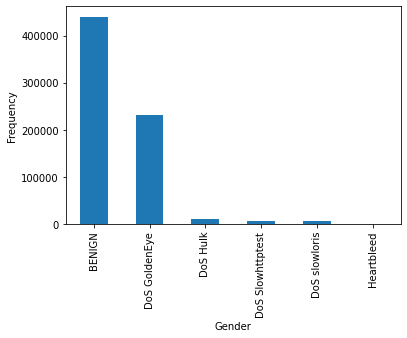

In [11]:
target.value_counts().plot(kind='bar')
plt.xticks([0,1,2,3,4,5], ['BENIGN','DoS GoldenEye','DoS Hulk','DoS Slowhttptest','DoS slowloris','Heartbleed'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y=le.fit_transform(target)

print(np.average(Y))
X=dfn.iloc[:,:-1]
X.astype(np.float32,copy=False)

X.drop(X.columns[14], axis=1,inplace=True)
X.drop(X.columns[14], axis=1,inplace=True)

print(X.shape)
X.dropna()
print(X.shape,np.max(np.max(X).astype(np.float32)))
count = -1
for i in np.max(X).astype(np.float32):
    count += 1
    print(count, '---',i)

0.7393861438451977
(692703, 76)
(692703, 76) 627046400.0
0 --- 65487.0
1 --- 120000000.0
2 --- 203943.0
3 --- 272353.0
4 --- 1224076.0
5 --- 627000000.0
6 --- 24820.0
7 --- 2065.0
8 --- 4640.7578125
9 --- 6429.19091796875
10 --- 19530.0
11 --- 1983.0
12 --- 4370.6865234375
13 --- 6715.73828125
14 --- 120000000.0
15 --- 84800000.0
16 --- 120000000.0
17 --- 120000000.0
18 --- 120000000.0
19 --- 120000000.0
20 --- 83700000.0
21 --- 120000000.0
22 --- 120000000.0
23 --- 120000000.0
24 --- 120000000.0
25 --- 82900000.0
26 --- 120000000.0
27 --- 120000000.0
28 --- 1.0
29 --- 0.0
30 --- 0.0
31 --- 0.0
32 --- 4290372.0
33 --- 5447060.0
34 --- 3000000.0
35 --- 2000000.0
36 --- 1448.0
37 --- 24820.0
38 --- 2279.75439453125
39 --- 4364.0224609375
40 --- 19000000.0
41 --- 1.0
42 --- 1.0
43 --- 1.0
44 --- 1.0
45 --- 1.0
46 --- 1.0
47 --- 0.0
48 --- 1.0
49 --- 43.0
50 --- 2612.0
51 --- 4640.7578125
52 --- 4370.6865234375
53 --- 4290372.0
54 --- 0.0
55 --- 0.0
56 --- 0.0
57 --- 0.0
58 --- 0.0
59 --- 

In [13]:
np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(label_puts, target, test_size = 0.99, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
print(x_train.shape,len(y_train),x_test.shape,len(y_test))
x_train.columns

(484892, 76) 484892 (207811, 76) 207811


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count',

In [14]:
print('---------------------------Decision Tree CLassifier------------------')

---------------------------Decision Tree CLassifier------------------


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#print(x_train.shape,np.max(np.max(x_train)))
#x_train.dropna(with_inf=True)
print(x_train.shape, y_train.shape)
dtc = DecisionTreeClassifier(max_depth = 35)
dtc = dtc.fit(x_train,y_train)

(484892, 76) (484892,)


In [16]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 2, 0, ..., 0, 2, 0])

In [17]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,35):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_test, y_test))
print(len(train_accuracy))
print(len(validation_accuracy))
frame = pd.DataFrame({'max_depth':range(1,35), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})

34
34


No handles with labels found to put in legend.


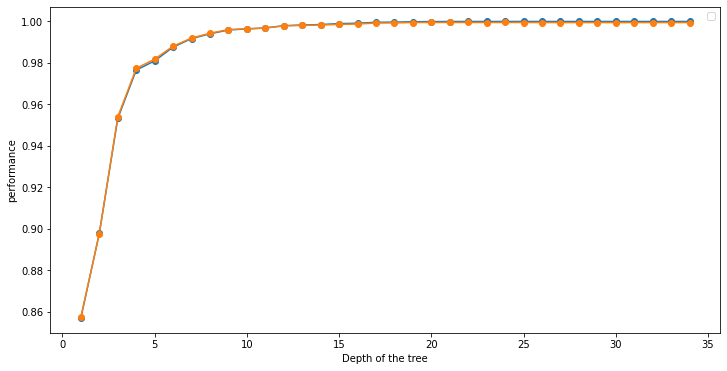

In [18]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of the tree')
plt.ylabel('performance')
plt.legend()

In [19]:
from sklearn.metrics import accuracy_score,f1_score
print(dtc.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label='positive', average='macro'))

0.9994129280933156
0.9994129280933156
0.9958730426164352


/home/mak/miniconda3/envs/stat-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [20]:
attributes = list(x_train)
sorted(zip(dtc.feature_importances_, attributes), reverse=True)

[(0.4972764741323975, ' Bwd Packet Length Std'),
 (0.20142153499975152, ' Packet Length Mean'),
 (0.10279929468397156, ' Destination Port'),
 (0.06899325500411406, ' Flow IAT Mean'),
 (0.039333836364155494, ' Total Length of Bwd Packets'),
 (0.018394656185210904, ' Bwd Packets/s'),
 (0.008898976480194984, ' Flow IAT Min'),
 (0.008833197776872267, ' Active Std'),
 (0.007541264222909833, ' Active Min'),
 (0.006332675476868239, 'Init_Win_bytes_forward'),
 (0.006052661247549269, ' Fwd Header Length.1'),
 (0.0060090970504986674, ' Bwd IAT Std'),
 (0.00496955727589113, ' Fwd IAT Min'),
 (0.0025714546463485467, ' Flow IAT Std'),
 (0.0024247494825508993, 'FIN Flag Count'),
 (0.0024008397504127195, ' Fwd Header Length'),
 (0.002374238640210652, ' Fwd Packet Length Min'),
 (0.0020746214971430585, ' Max Packet Length'),
 (0.0019127119895123307, ' Packet Length Std'),
 (0.001357948520432388, ' Flow IAT Max'),
 (0.0012141097193221714, ' Bwd IAT Min'),
 (0.0010496967823484334, ' Subflow Bwd Bytes'),